# Loading the Data

In [1]:
!gdown '1MicQWPrXQUJ2_M56iAFNzMvVC6t_MtKr'

Downloading...
From: https://drive.google.com/uc?id=1MicQWPrXQUJ2_M56iAFNzMvVC6t_MtKr
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 66.2MB/s]


In [2]:
import pandas as pd
weather_data = pd.read_csv('weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Correlation and Histogram

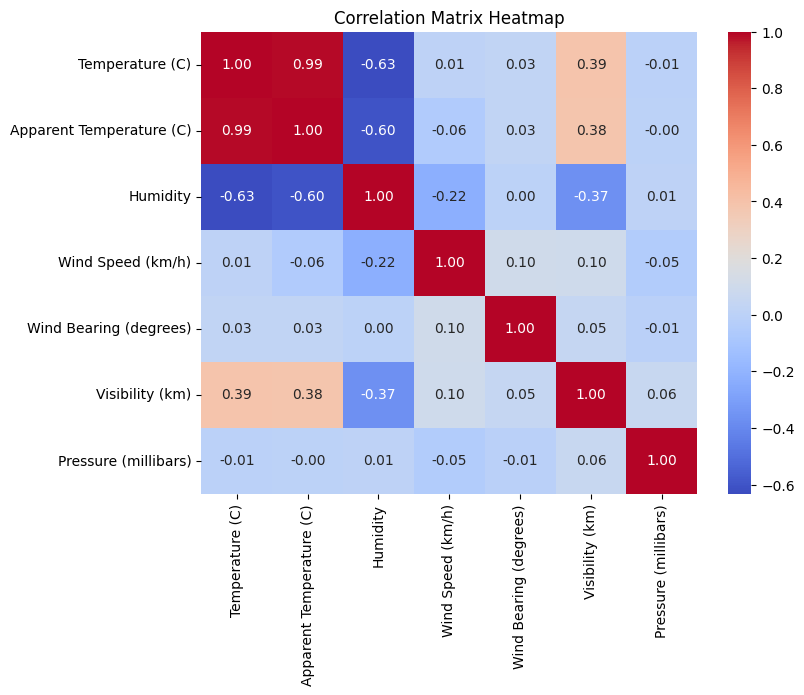

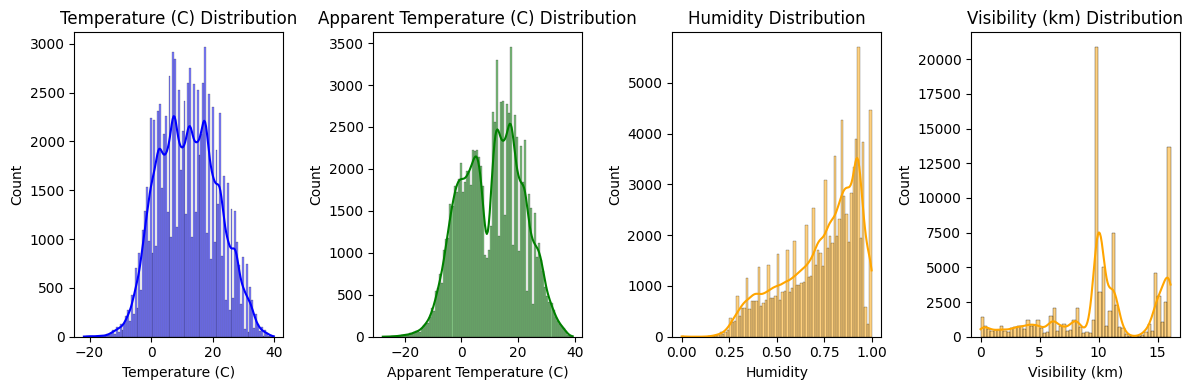

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = weather_data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity' ,'Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)' ]].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot histograms of the features
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
sns.histplot(weather_data['Temperature (C)'], kde=True, color='blue')
plt.title('Temperature (C) Distribution')

plt.subplot(1, 4, 2)
sns.histplot(weather_data['Apparent Temperature (C)'], kde=True, color='green')
plt.title('Apparent Temperature (C) Distribution')

plt.subplot(1, 4, 3)
sns.histplot(weather_data['Humidity'], kde=True, color='orange')
plt.title('Humidity Distribution')

plt.subplot(1, 4, 4)
sns.histplot(weather_data['Visibility (km)'], kde=True, color='orange')
plt.title('Visibility (km) Distribution')

plt.tight_layout()
plt.show()


# LS and RLS

In [10]:
#RLS code

import math

class RLS:
    def __init__(self, num_vars, lam, delta):
        '''
        num_vars: number of variables including constant
        lam: forgetting factor, usually very close to 1.
        '''
        self.num_vars = num_vars

        # delta controls the initial state.
        self.A = delta*np.matrix(np.identity(self.num_vars))
        self.w = np.matrix(np.zeros(self.num_vars))
        self.w = self.w.reshape(self.w.shape[1],1)

        # Variables needed for add_obs
        self.lam_inv = lam**(-1)
        self.sqrt_lam_inv = math.sqrt(self.lam_inv)

        # A priori error
        self.a_priori_error = 0

        # Count of number of observations added
        self.num_obs = 0

    def add_obs(self, x, t):
        '''
        Add the observation x with label t.
        x is a column vector as a numpy matrix
        t is a real scalar
        '''
        z = self.lam_inv*self.A*x
        alpha = float((1 + x.T*z)**(-1))
        self.a_priori_error = float(t - self.w.T*x)
        self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
        self.A -= alpha*z*z.T
        self.num_obs += 1

    def fit(self, X, y):
        '''
        Fit a model to X,y.
        X and y are numpy arrays.
        Individual observations in X should have a prepended 1 for constant coefficient.
        '''
        for i in range(len(X)):
            x = np.transpose(np.matrix(X[i]))
            self.add_obs(x,y[i])


    def get_error(self):
        '''
        Finds the a priori (instantaneous) error.
        Does not calculate the cumulative effect
        of round-off errors.
        '''
        return self.a_priori_error

    def predict(self, x):
        '''
        Predict the value of observation x. x should be a numpy matrix (col vector)
        '''
        return float(self.w.T*x)


LS Mean Squared Error: 79.0675573175552
LS R-squared: 0.13990917051660678


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 78.25098313096889
RLS R-squared: 0.14879180194348918


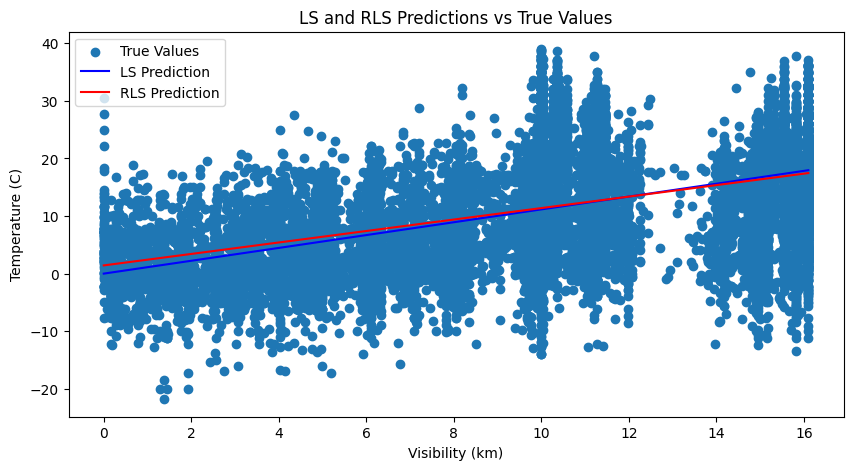

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


# Extract features and targets
X = weather_data[['Visibility (km)']].values
y = weather_data[['Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)

print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)

# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = 0.99  # Forgetting factor
delta = .0001  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)

r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)

# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Visibility (km)')
plt.ylabel('Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



LS Mean Squared Error: 98.5903742889745
LS R-squared: 0.1419106077513249


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 98.48300518873218
RLS R-squared: 0.14284510350344748


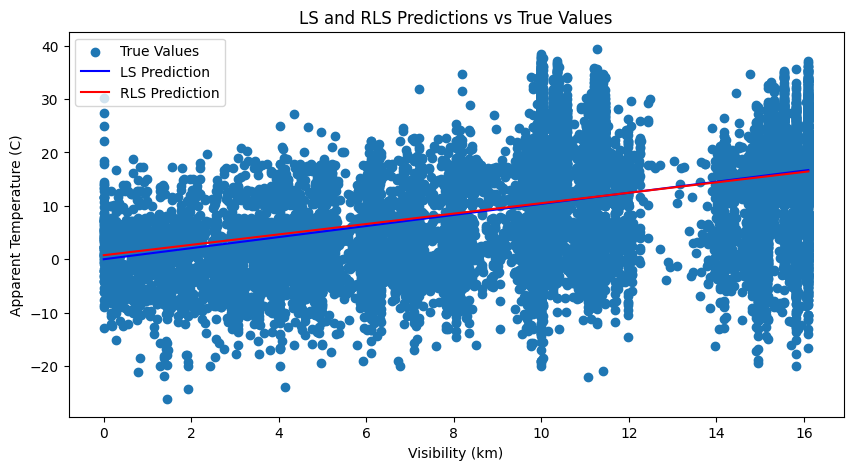

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Extract features and targets
X = weather_data[['Visibility (km)']].values
y = weather_data[['Apparent Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)

print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)

# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = .99  # Forgetting factor
delta = 20  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)

r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)

# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Visibility (km)')
plt.ylabel('Apparent Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



LS Mean Squared Error: 135.3640896416121
LS R-squared: -0.4724801940513328


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 54.46504011052992
RLS R-squared: 0.40753346738193597


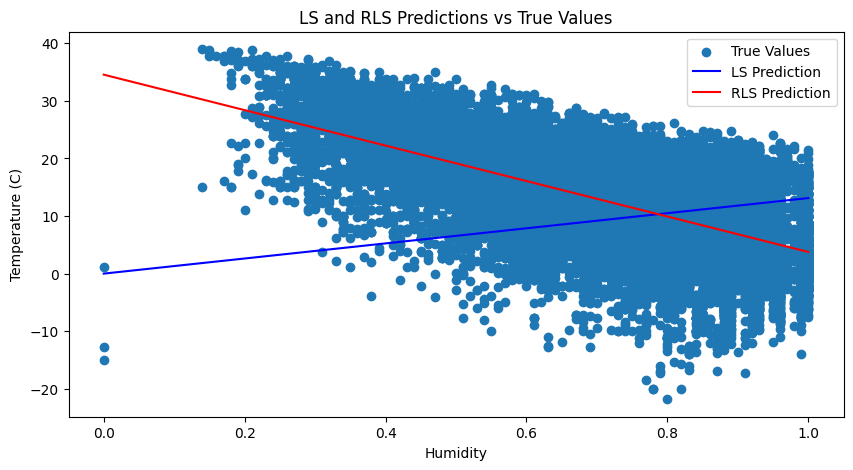

In [46]:
# Extract features and targets
X = weather_data[['Humidity']].values
y = weather_data[['Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)

print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)

# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = 0.99  # Forgetting factor
delta = 20  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)

r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)

# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



LS Mean Squared Error: 155.30419813873576
LS R-squared: -0.3517028001529634


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 72.21762535858043
RLS R-squared: 0.37144798667716505


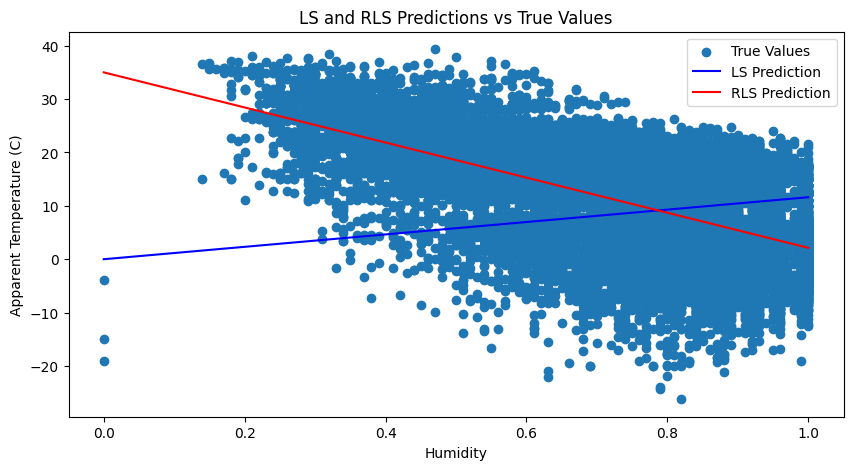

In [45]:
from sklearn.metrics import r2_score


# Extract features and targets
X = weather_data[['Humidity']].values
y = weather_data[['Apparent Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)
print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)


# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = 0.99  # Forgetting factor
delta = 20  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)


# Assuming y_true contains the true values and y_pred contains the predicted values
r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)


# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



LS Mean Squared Error: 125.38845486045247
LS R-squared: -0.36396600334361007


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 91.9358653832539
RLS R-squared: -7.129851221510108e-05


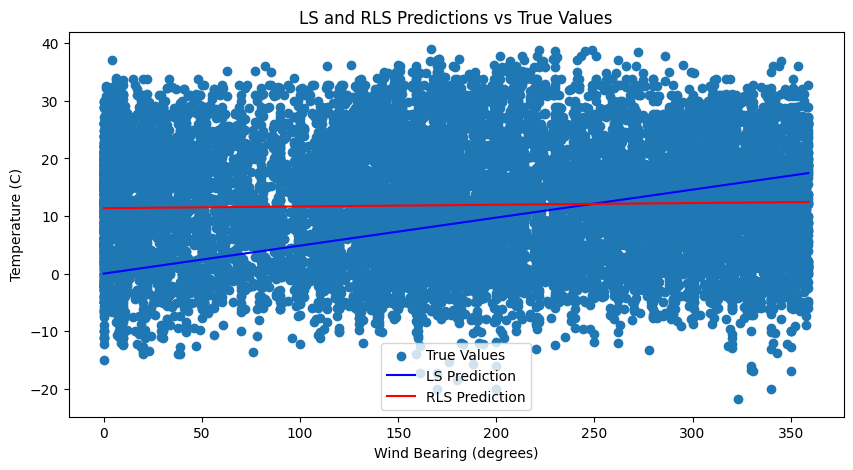

In [44]:
from sklearn.metrics import r2_score


# Extract features and targets
X = weather_data[['Wind Bearing (degrees)']].values
y = weather_data[[ 'Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)

print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)

# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = 0.99  # Forgetting factor
delta = 20  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)

r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)

# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



LS Mean Squared Error: 142.3900997677759
LS R-squared: -0.23930388796204172


<ipython-input-10-2ca861c908b4>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float((1 + x.T*z)**(-1))
<ipython-input-10-2ca861c908b4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.a_priori_error = float(t - self.w.T*x)
<ipython-input-10-2ca861c908b4>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
<ipython-input-10-2ca861c908b4>:64: DeprecationWarning: Conversion of an array with ndim > 0

RLS Mean Squared Error: 114.90579855292775
RLS R-squared: -9.202274787356579e-05


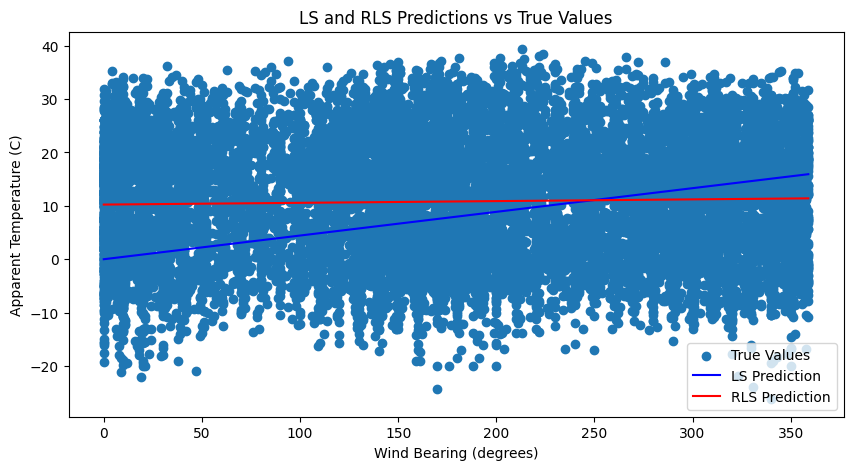

In [43]:
# Extract features and targets
X = weather_data[['Wind Bearing (degrees)']].values
y = weather_data[[ 'Apparent Temperature (C)']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Least Squares (LS) estimation
ls_theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
ls_predictions = np.dot(X_test, ls_theta)

# Calculate mean squared error for LS and RLS
ls_mse = mean_squared_error(y_test, ls_predictions)

print("LS Mean Squared Error:", ls_mse)

r_squared = r2_score(y_test,  ls_predictions)
print("LS R-squared:", r_squared)

# Instantiate the RLS model
num_vars = X_train.shape[1] + 1  # Number of variables including constant
lam = 0.99  # Forgetting factor
delta = 20  # Initial state control parameter
rls_model = RLS(num_vars, lam, delta)

# Fit the RLS model to the training data
for i in range(len(X_train)):
    x = np.insert(X_train[i], 0, 1)  # Prepend 1 for constant coefficient
    rls_model.add_obs(x.reshape(-1, 1), y_train[i][0])  # Assuming y_train is a single target

# Make predictions on the test data
rls_predictions = np.array([rls_model.predict(np.insert(x, 0, 1).reshape(-1, 1)) for x in X_test])

# Calculate Mean Squared Error
rls_mse = mean_squared_error(y_test, rls_predictions)

print("RLS Mean Squared Error:", rls_mse)

r_squared = r2_score(y_test,  rls_predictions)
print("RLS R-squared:", r_squared)

# Plot LS and RLS predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='True Values')
# Sort X_test for plotting the lines
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
ls_predictions_sorted = ls_predictions[sorted_indices]
rls_predictions_sorted = rls_predictions[sorted_indices]
plt.plot(X_test_sorted, ls_predictions_sorted, color='blue', label='LS Prediction')
plt.plot(X_test_sorted, rls_predictions_sorted, color='red', label='RLS Prediction')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Apparent Temperature (C)')
plt.title('LS and RLS Predictions vs True Values')
plt.legend()
plt.show()



# WLS

In [33]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Visibility (km)']].values
y = weather_data[['Temperature (C)']].values

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            WLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                 1.760e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:06:53   Log-Likelihood:            -3.4644e+05
No. Observations:               96453   AIC:                         6.929e+05
Df Residuals:                   96451   BIC:                         6.929e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6710      0.075     35.461      0.0

In [36]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Humidity']].values
y = weather_data[['Temperature (C)']].values

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            WLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:07:39   Log-Likelihood:            -3.2991e+05
No. Observations:               96453   AIC:                         6.598e+05
Df Residuals:                   96451   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6369      0.093    373.651      0.0

In [41]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Wind Bearing (degrees)']].values
y = weather_data[['Temperature (C)']].values


error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     86.82
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.22e-20
Time:                        22:12:03   Log-Likelihood:            -3.5448e+05
No. Observations:               96453   AIC:                         7.090e+05
Df Residuals:                   96451   BIC:                         7.090e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4325      0.062    184.816      0.0

In [50]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Visibility (km)']].values
y = weather_data[['Apparent Temperature (C)']].values

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            WLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:34:39   Log-Likelihood:            -3.5785e+05
No. Observations:               96453   AIC:                         7.157e+05
Df Residuals:                   96451   BIC:                         7.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7766      0.085      9.160      0.0

In [51]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Humidity']].values
y = weather_data[['Apparent Temperature (C)']].values

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            WLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 5.499e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:35:05   Log-Likelihood:            -3.4369e+05
No. Observations:               96453   AIC:                         6.874e+05
Df Residuals:                   96451   BIC:                         6.874e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0879      0.107    328.119      0.0

In [52]:
import numpy as np
import statsmodels.api as sm


# Extract features and targets
X = weather_data[['Wind Bearing (degrees)']].values
y = weather_data[['Apparent Temperature (C)']].values

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.92e-19
Time:                        22:35:42   Log-Likelihood:            -3.6541e+05
No. Observations:               96453   AIC:                         7.308e+05
Df Residuals:                   96451   BIC:                         7.308e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3128      0.069    148.860      0.0